# **Notebook 6: Regression with Cleaned and Transformed Dataset**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

## Change working directory

In [1]:
import os

# Get the current directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Change the directory to the new path
os.chdir('/workspace/milestone-project-housing-issues')

# Get the updated current directory
current_dir = os.getcwd()
print("New Current Directory:", current_dir)

Current Directory: /workspace/milestone-project-housing-issues/jupyter_notebooks
New Current Directory: /workspace/milestone-project-housing-issues


## Load dataset

### Load TrainSetTransformed

In [2]:
import pandas as pd
trainset_transformed = pd.read_csv('/workspace/milestone-project-housing-issues/outputs/datasets/cleaned/TrainSetTransformed.csv')
print(trainset_transformed.shape)
trainset_transformed.head()

(1168, 19)


,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd,SalePrice
0,984.0,3,0,15.937006,0,40.624672,34.732831,0,42.755117,0,11694.0,90.0,21.260292,4.977715,0,0,1822.0,2007,314813
1,720.0,2,1,69.279335,1,31.466463,23.053045,1,29.899833,1,6600.0,60.0,25.536738,4.242568,0,1,894.0,1962,109500
2,840.0,2,1,90.580158,2,15.356688,26.839552,0,31.048349,1,13360.0,80.0,15.099669,5.492862,1,1,876.0,2006,163500
3,676.0,3,1,126.511219,0,21.341597,36.315495,2,41.097445,0,13265.0,80.0,12.165525,4.300525,0,2,1568.0,2002,271000
4,806.0,3,1,110.906783,1,39.203404,36.055097,2,39.255573,0,13704.0,113.0,12.247449,4.654167,0,3,1541.0,2002,205000


In [3]:
trainset_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2ndFlrSF      1168 non-null   float64
 1   BedroomAbvGr  1168 non-null   int64  
 2   BsmtExposure  1168 non-null   int64  
 3   BsmtFinSF1    1168 non-null   float64
 4   BsmtFinType1  1168 non-null   int64  
 5   BsmtUnfSF     1168 non-null   float64
 6   GarageArea    1168 non-null   float64
 7   GarageFinish  1168 non-null   int64  
 8   GrLivArea     1168 non-null   float64
 9   KitchenQual   1168 non-null   int64  
 10  LotArea       1168 non-null   float64
 11  LotFrontage   1168 non-null   float64
 12  MasVnrArea    1168 non-null   float64
 13  OpenPorchSF   1168 non-null   float64
 14  OverallCond   1168 non-null   int64  
 15  OverallQual   1168 non-null   int64  
 16  TotalBsmtSF   1168 non-null   float64
 17  YearRemodAdd  1168 non-null   int64  
 18  SalePrice     1168 non-null 

In [4]:
missing_values_count = trainset_transformed.isna().sum()
missing_values_count

2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
SalePrice       0
dtype: int64

### Load TestSetTransformed

In [5]:
import pandas as pd

testset_transformed = pd.read_csv('/workspace/milestone-project-housing-issues/outputs/datasets/cleaned/TestSetTransformed.csv')
print(testset_transformed.shape)
testset_transformed.head()

(292, 19)


,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearRemodAdd,SalePrice
0,892.000,4,1,126.575860,3,30.317045,28.233895,1,50.149776,1,17695.875,88.000,22.978251,2.939703,4,4,2035.0,1975,200624
1,620.000,3,1,63.310138,6,18.107132,20.578416,0,39.724048,3,9490.000,79.000,18.384776,5.096815,1,4,806.0,1980,133000
2,247.625,3,1,38.616805,5,25.266650,24.485212,0,34.684290,0,7015.000,106.000,12.688578,3.724104,6,1,709.0,2008,110000
3,866.000,4,1,62.215089,6,29.575211,28.771824,1,44.966654,1,10005.000,83.000,17.291616,5.068166,0,3,1160.0,1977,192000
4,762.000,3,1,96.578176,1,25.286640,21.494186,0,33.045423,1,1680.000,29.625,19.519221,3.218082,0,4,525.0,1971,88000


In [6]:
testset_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2ndFlrSF      292 non-null    float64
 1   BedroomAbvGr  292 non-null    int64  
 2   BsmtExposure  292 non-null    int64  
 3   BsmtFinSF1    292 non-null    float64
 4   BsmtFinType1  292 non-null    int64  
 5   BsmtUnfSF     292 non-null    float64
 6   GarageArea    292 non-null    float64
 7   GarageFinish  292 non-null    int64  
 8   GrLivArea     292 non-null    float64
 9   KitchenQual   292 non-null    int64  
 10  LotArea       292 non-null    float64
 11  LotFrontage   292 non-null    float64
 12  MasVnrArea    292 non-null    float64
 13  OpenPorchSF   292 non-null    float64
 14  OverallCond   292 non-null    int64  
 15  OverallQual   292 non-null    int64  
 16  TotalBsmtSF   292 non-null    float64
 17  YearRemodAdd  292 non-null    int64  
 18  SalePrice     292 non-null    

In [7]:
missing_values_count = testset_transformed.isna().sum()
missing_values_count

2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
SalePrice       0
dtype: int64

---

### Combining trainset_transformed and testset_transform to enable fresh split into train and test sets

In [8]:
import pandas as pd

# Combine the two datasets row-wise
combined_df = pd.concat([trainset_transformed, testset_transformed], ignore_index=True)

# Check the combined dataframe
print(combined_df.shape)
print(combined_df.head())

(1460, 19)
   2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  BsmtUnfSF  \
0     984.0             3             0   15.937006             0  40.624672   
1     720.0             2             1   69.279335             1  31.466463   
2     840.0             2             1   90.580158             2  15.356688   
3     676.0             3             1  126.511219             0  21.341597   
4     806.0             3             1  110.906783             1  39.203404   

   GarageArea  GarageFinish  GrLivArea  KitchenQual  LotArea  LotFrontage  \
0   34.732831             0  42.755117            0  11694.0         90.0   
1   23.053045             1  29.899833            1   6600.0         60.0   
2   26.839552             0  31.048349            1  13360.0         80.0   
3   36.315495             2  41.097445            0  13265.0         80.0   
4   36.055097             2  39.255573            0  13704.0        113.0   

   MasVnrArea  OpenPorchSF  OverallCond  Over

---

## ML Pipeline: Regressor with transformed dataset

In [9]:
from sklearn.pipeline import Pipeline

# Feature Engineering
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection

# Feat Scaling
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


def PipelineOptimization(model):

    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        ("feat_selection", SelectFromModel(model)),

        ("model", model),
    ])
    return pipeline_base

/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


---

## Hyperparameter Optimisation

In [11]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches

### Split Train - Test Set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    combined_df.drop(['SalePrice'], axis=1),
    combined_df['SalePrice'],
    test_size=0.2,
    random_state=0
)

print("* Train set:", X_train.shape, y_train.shape,
      "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 18) (1168,) 
* Test set: (292, 18) (292,)


In [13]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(X_train, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Grid Search CV -Sklearn

In [42]:
models_quick_search = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
    'LinearRegression': LinearRegression(),
}

params_quick_search = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {},
    'RandomForestRegressor': {},
    'ExtraTreesRegressor': {},
    'AdaBoostRegressor': {},
    'GradientBoostingRegressor': {},
    'XGBRegressor': {}
}

In [43]:
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [30]:
import numpy as np

grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
2,ExtraTreesRegressor,0.650928,0.739768,0.793613,0.052369
5,XGBRegressor,0.61659,0.730256,0.78375,0.059229
4,GradientBoostingRegressor,0.654643,0.712853,0.75205,0.033584
1,RandomForestRegressor,0.629021,0.711619,0.748996,0.043748
6,LinearRegression,0.650385,0.687289,0.721194,0.02458
3,AdaBoostRegressor,0.534435,0.660016,0.764676,0.079919
0,DecisionTreeRegressor,0.250552,0.480987,0.656747,0.135388


### Search for most suitable model to find the best hyperparameters

In [31]:
models_search_regressor = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
}

params_search_regressor = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [100, 300],  # Number of trees
        'model__max_depth': [3, 10, None],  # Maximum depth of each tree
        'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
        'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
        'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    }
}

# params_quick_search_regressor = {
#     'ExtraTreesRegressor': {
#         'model__n_estimators': [100, 300],  # Number of trees
#         'model__max_depth': [3, 10, None],  # Maximum depth of each tree
#         'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
#         'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
#         'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    # },
# }


In [32]:
search = HyperparameterOptimizationSearch(models=models_search_regressor, params=params_search_regressor)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [33]:
grid_search_summary_regressor, grid_search_pipelines_regressor = search.score_summary(sort_by='mean_score')
grid_search_summary_regressor

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,model__n_estimators
43,ExtraTreesRegressor,0.708693,0.772354,0.815299,0.035735,None,sqrt,1,5,300
22,ExtraTreesRegressor,0.725204,0.769879,0.803064,0.028348,10,auto,4,5,100
20,ExtraTreesRegressor,0.725204,0.769879,0.803064,0.028348,10,auto,4,2,100
38,ExtraTreesRegressor,0.721921,0.769381,0.799946,0.027526,None,auto,4,5,100
36,ExtraTreesRegressor,0.721921,0.769381,0.799946,0.027526,None,auto,4,2,100
27,ExtraTreesRegressor,0.701051,0.769257,0.81009,0.038261,10,sqrt,1,5,300
21,ExtraTreesRegressor,0.7272,0.76905,0.802941,0.027702,10,auto,4,2,300
23,ExtraTreesRegressor,0.7272,0.76905,0.802941,0.027702,10,auto,4,5,300
42,ExtraTreesRegressor,0.708604,0.768323,0.811245,0.034416,None,sqrt,1,5,100
39,ExtraTreesRegressor,0.723952,0.768068,0.801806,0.027646,None,auto,4,5,300


---

### Best model and hyperparameters

In [34]:
best_model_regressor = grid_search_summary_regressor.iloc[0, 0]
best_model_regressor

'ExtraTreesRegressor'

In [36]:
for model, gs in grid_search_pipelines_regressor.items():
    print(f"Model: {model}")
    print(f"Best score: {gs.best_score_}")
    print(f"Best params: {gs.best_params_}")

Model: ExtraTreesRegressor
Best score: 0.772353761509185
Best params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}


In [40]:
best_params_regressor = grid_search_pipelines_regressor[best_model_regressor].best_params_
best_params_regressor

{'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 300}

#### Best regressor pipeline

In [41]:
best_regressor_pipeline = grid_search_pipelines_regressor[best_model_regressor].best_estimator_
best_regressor_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['2ndFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',
                                                     'BsmtFinType1',
                                                     'BsmtUnfSF', 'GarageArea',
                                                     'GarageFinish',
                                                     'GrLivArea', 'KitchenQual',
                                                     'LotArea', 'LotFrontage',
                                                     'MasVnrArea',
                                                     'OpenPorchSF',
                                    

---

### Assessing Feature Importance

* These are the 4 most important features in descending order. The model was trained on them: 
['GrLivArea', 'TotalBsmtSF', 'KitchenQual', 'GarageArea']


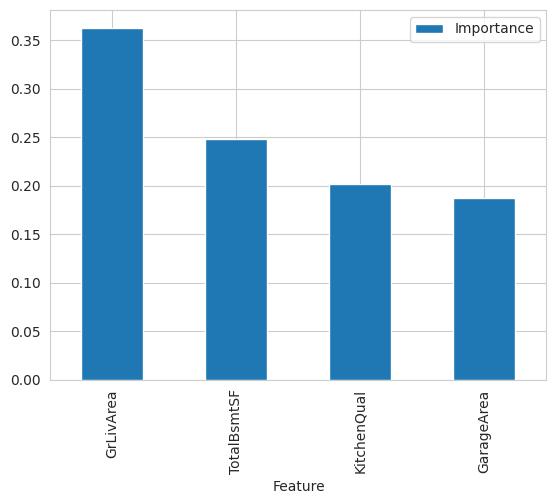

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('whitegrid')

data_cleaning_feat_eng_steps = 2

# Transforming the X_train using the steps before model selection
pipeline_steps_before_model = Pipeline(best_regressor_pipeline.steps[:data_cleaning_feat_eng_steps])
X_transformed = pipeline_steps_before_model.transform(X_train)

# Convert the transformed data back into a DataFrame to retain column names
columns_after_data_cleaning_feat_eng = pd.DataFrame(X_transformed, columns=X_train.columns)

# Get the most important features from the feature selection step
best_features = columns_after_data_cleaning_feat_eng.columns[best_regressor_pipeline['feat_selection'].get_support()].to_list()

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({
    'Feature': best_features,
    'Importance': best_regressor_pipeline['model'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

# Plot the feature importance
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()


---

## Evaluate on Train and Test Sets

In [109]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)


def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(
        mean_squared_error(y, prediction)).round(3))
    print("\n")


def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")

    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")

    plt.show()

Model Evaluation 

* Train Set
R2 Score: 0.939
Mean Absolute Error: 12326.223
Mean Squared Error: 397149102.088
Root Mean Squared Error: 19928.6


* Test Set
R2 Score: 0.728
Mean Absolute Error: 23669.673
Mean Squared Error: 1452204345.721
Root Mean Squared Error: 38107.799




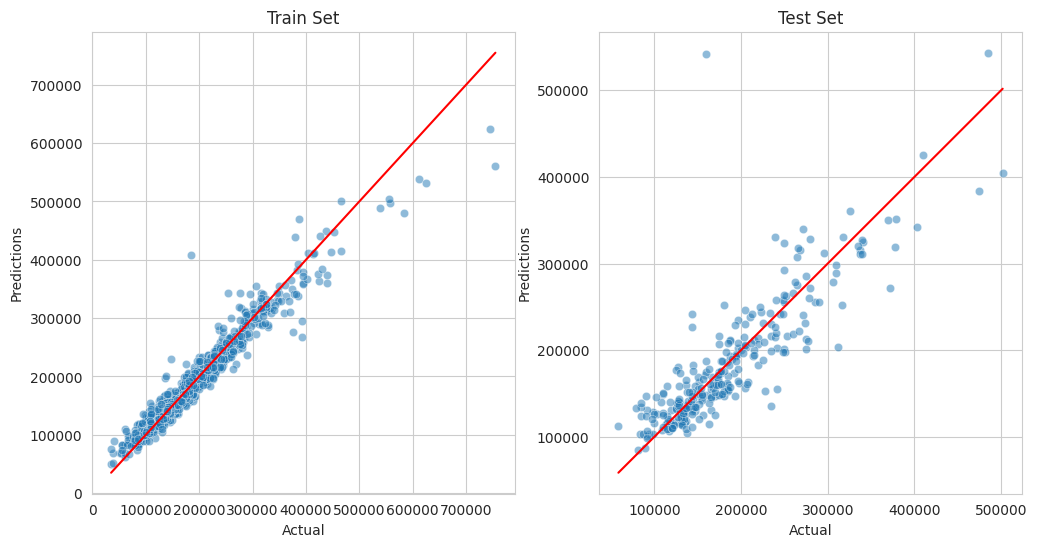

In [110]:
regression_performance(X_train, y_train, X_test, y_test, best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

---

# Regressor with PCA

Section 2 content

In [114]:
import pandas as pd

# Combine the two datasets row-wise
df_for_pca = pd.concat([trainset_transformed, testset_transformed], ignore_index=True)

# Check the combined dataframe
df_for_pca.info

<bound method DataFrame.info of       2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      984.000             3             0   15.937006             0   
1      720.000             2             1   69.279335             1   
2      840.000             2             1   90.580158             2   
3      676.000             3             1  126.511219             0   
4      806.000             3             1  110.906783             1   
...        ...           ...           ...         ...           ...   
1455  1336.625             1             2  147.190986             0   
1456   793.000             2             2  147.190986             0   
1457   862.000             5             1   36.302152             3   
1458   670.000             2             1   50.289647             5   
1459   530.000             3             1   78.643228             1   

      BsmtUnfSF  GarageArea  GarageFinish  GrLivArea  KitchenQual  LotArea  \
0     40.624672   34.7328

In [120]:
pipeline = PipelineOptimization(model=LinearRegression())
pipeline_pca = Pipeline(pipeline.steps[:3])
df_pca = pipeline_pca.fit(X_train, y_train).transform(X_train)

print(df_pca.shape,'\n', type(df_pca))

(1168, 6) 
 <class 'numpy.ndarray'>


#### Applying PCA to the scaled data

* The 6 components explain 100.0% of the data 



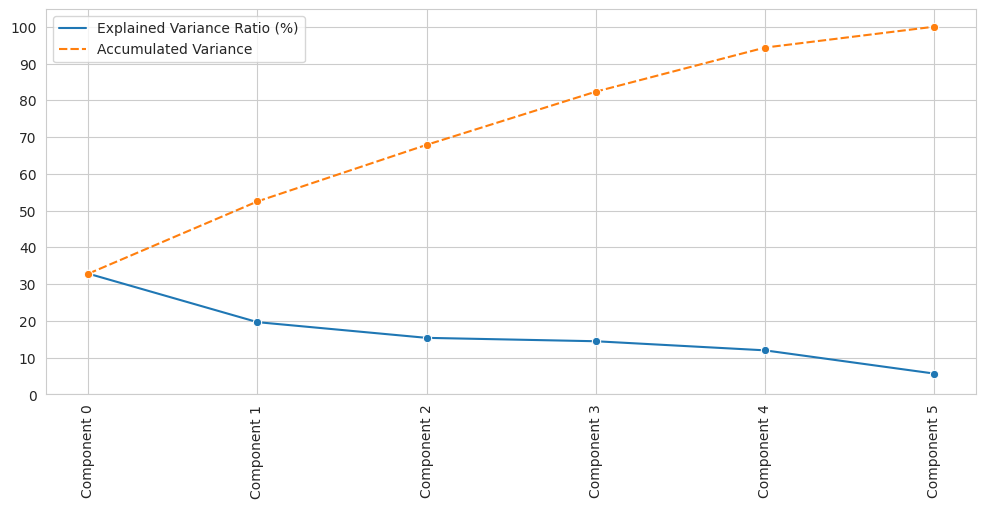

In [122]:
import numpy as np
from sklearn.decomposition import PCA

n_components = 6


def pca_components_analysis(df_pca, n_components):
    pca = PCA(n_components=n_components).fit(df_pca)
    x_PCA = pca.transform(df_pca)  # array with transformed PCA

    ComponentsList = ["Component " + str(number)
                      for number in range(n_components)]
    dfExplVarRatio = pd.DataFrame(
        data=np.round(100 * pca.explained_variance_ratio_, 3),
        index=ComponentsList,
        columns=['Explained Variance Ratio (%)'])

    dfExplVarRatio['Accumulated Variance'] = dfExplVarRatio['Explained Variance Ratio (%)'].cumsum(
    )

    PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum(
    )

    print(
        f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=dfExplVarRatio,  marker="o")
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, 110, 10))
    plt.show()


pca_components_analysis(df_pca=df_pca, n_components=n_components)

* The 9 components explain 79.59% of the data 



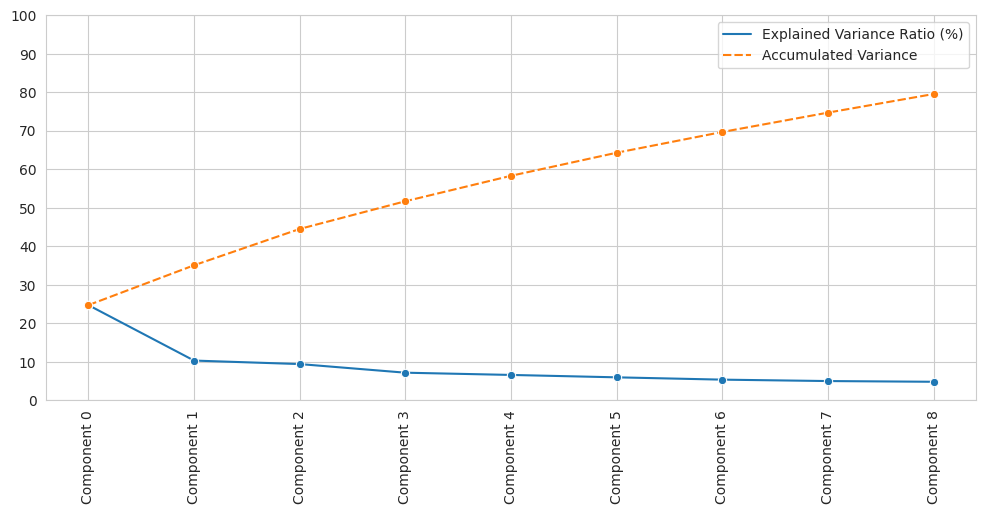

In [26]:
n_components = 9
pca_components_analysis(df_pca=df_pca, n_components=n_components)

### Rewrite ML Pipeline for Modelling

In [147]:
from sklearn.decomposition import PCA


def PipelineOptimization(model):
    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        # PCA replace Feature Selection
        ("PCA", PCA(n_components=9, random_state=0)),

        ("model", model),

    ])

    return pipeline_base

In [148]:
print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 18) (1168,) 
* Test set: (292, 18) (292,)


In [149]:
models_quick_search = {
    'LinearRegression': LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
}

params_quick_search = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    'RandomForestRegressor': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20]
    },
    'ExtraTreesRegressor': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20]
    },
    'AdaBoostRegressor': {
        'model__n_estimators': [50, 100, 200]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 5, 10]
    },
    'XGBRegressor': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 5, 10]
    }
}


In [141]:
# models_search_pca = {
#     "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
# }

# params_search_pca = {
#     "ExtraTreesRegressor": {
#         'model__n_estimators': [100, 300],  # Number of trees
#         'model__max_depth': [3, 10, None],  # Maximum depth of each tree
#         'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
#         'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
#         'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
#     }
# }

# params_quick_search_pca = {
#     'ExtraTreesRegressor': {
#         'model__n_estimators': [100, 300],  # Number of trees
#         'model__max_depth': [3, 10, None],  # Maximum depth of each tree
#         'model__min_samples_split': [2, 5],  # Minimum samples required to split a node
#         'model__min_samples_leaf': [1, 4],  # Minimum samples required at a leaf node
#         'model__max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
#     },
# }

In [150]:
quick_search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
quick_search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In

In [146]:
grid_search_summary, grid_search_pipelines = quick_search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
3,ExtraTreesRegressor,0.551049,0.714655,0.792301,0.085786
5,GradientBoostingRegressor,0.542517,0.705731,0.782447,0.085246
2,RandomForestRegressor,0.561719,0.703955,0.78627,0.075851
6,XGBRegressor,0.463141,0.660882,0.741703,0.103561
0,LinearRegression,0.635126,0.644675,0.653022,0.007204
4,AdaBoostRegressor,0.531821,0.630802,0.688796,0.055596
1,DecisionTreeRegressor,0.228854,0.458935,0.646844,0.134355


### Extensive search on the most suitable model to find the best hyperparameters

In [131]:
models_search_pca = {
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

# documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

# We will not conduct an extensive search, since the focus
# is on how to combine all knowledge in an applied project.
# In a workplace project, you may spend more time in this step
params_search_pca = {
    "RandomForestRegressor":{
        'model__n_estimators': [100, 300],
        'model__max_depth': [3, 10, None],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 4],
        'model__max_features': ['auto', 'sqrt'],
    }
}

In [132]:
search = HyperparameterOptimizationSearch(models=models_search_pca, params=params_search_pca)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [138]:
grid_search_summary_pca, grid_search_pipelines_pca = search.score_summary(sort_by='mean_score')
grid_search_summary_pca

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,model__n_estimators
41,RandomForestRegressor,0.692535,0.721412,0.73756,0.017026,None,sqrt,1,2,300
43,RandomForestRegressor,0.696667,0.719026,0.741094,0.018153,None,sqrt,1,5,300
25,RandomForestRegressor,0.696645,0.718519,0.73862,0.017834,10,sqrt,1,2,300
27,RandomForestRegressor,0.694121,0.718162,0.735015,0.017884,10,sqrt,1,5,300
40,RandomForestRegressor,0.683703,0.718142,0.739025,0.018933,None,sqrt,1,2,100
26,RandomForestRegressor,0.691265,0.717707,0.735594,0.017923,10,sqrt,1,5,100
42,RandomForestRegressor,0.692049,0.712444,0.731788,0.017157,None,sqrt,1,5,100
24,RandomForestRegressor,0.680813,0.711951,0.736376,0.021292,10,sqrt,1,2,100
31,RandomForestRegressor,0.684002,0.710077,0.731982,0.01576,10,sqrt,4,5,300
29,RandomForestRegressor,0.684002,0.710077,0.731982,0.01576,10,sqrt,4,2,300


### Best model and hyperparameters:

In [137]:
best_model_pca = grid_search_summary_pca.iloc[0,0]
best_model_pca

'RandomForestRegressor'

In [139]:
best_params_pca = grid_search_pipelines_pca[best_model_pca].best_params_
best_params_pca

{'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 300}

In [140]:
best_regressor_pca_pipeline = grid_search_pipelines_pca[best_model_pca].best_estimator_
best_regressor_pca_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['2ndFlrSF', 'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',
                                                     'BsmtFinType1',
                                                     'BsmtUnfSF', 'GarageArea',
                                                     'GarageFinish',
                                                     'GrLivArea', 'KitchenQual',
                                                     'LotArea', 'LotFrontage',
                                                     'MasVnrArea',
                                                     'OpenPorchSF',
                                    

## Evaluating Regressor on Train and Tests Sets

Model Evaluation 

* Train Set
R2 Score: 0.897
Mean Absolute Error: 15658.157
Mean Squared Error: 633206482.536
Root Mean Squared Error: 25163.594


* Test Set
R2 Score: 0.799
Mean Absolute Error: 20606.039
Mean Squared Error: 1391233259.205
Root Mean Squared Error: 37299.239




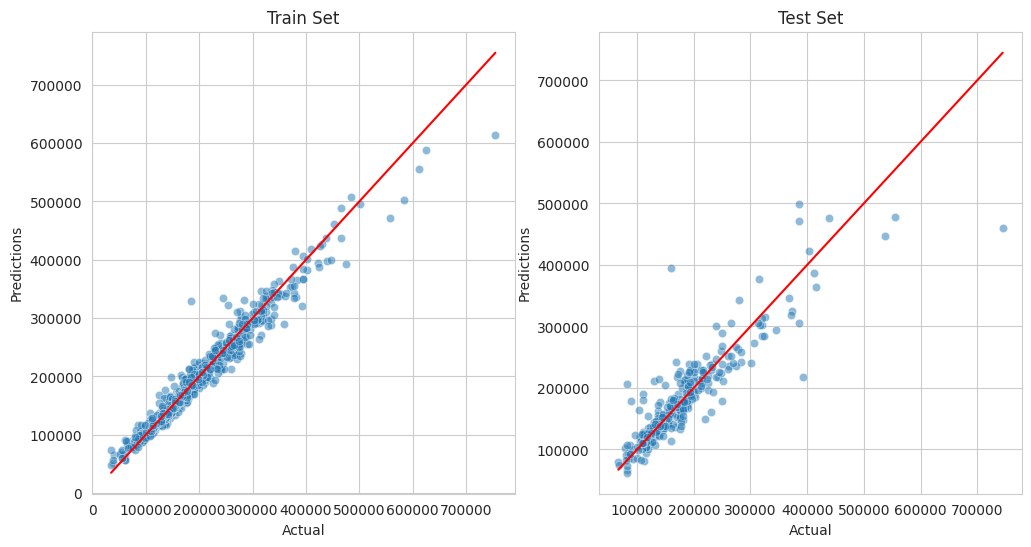

In [38]:
regression_performance(X_train, y_train, X_test, y_test,best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test,
                            best_regressor_pca_pipeline)

# Convert Regression to Classification

* The classes represent the following ranges: 
{'SalePrice': [-inf, 129975.0, 163000.0, 214000.0, inf]} 



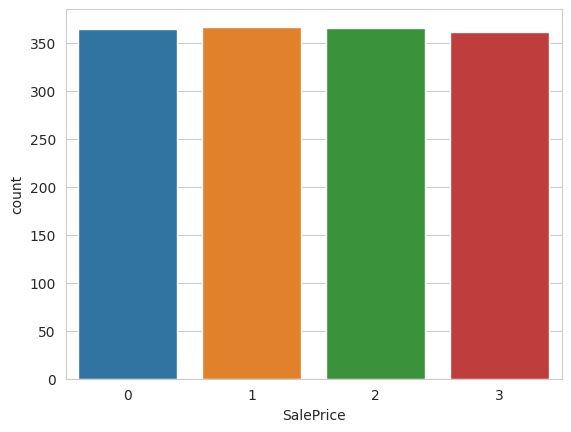

In [39]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
disc = EqualFrequencyDiscretiser(q=4, variables=['SalePrice'])  # we will try q as 2, and 3
df_clf = disc.fit_transform(df_houseprices_regression)

print(f"* The classes represent the following ranges: \n{disc.binner_dict_} \n")
sns.countplot(data=df_clf, x='SalePrice')
plt.show()

In [40]:
df_clf.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,2
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,2
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,3


### Rewriting ML Pipeline for modelling

In [41]:
def PipelineOptimization(model):
    pipeline_base = Pipeline([

        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['BsmtExposure', 'BsmtFinType1',
                                                                'GarageFinish', 'KitchenQual'])),


        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        ("feat_selection",  SelectFromModel(model)),

        ("model", model),

    ])

    return pipeline_base

#### Algorithms for classification

In [42]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

### Splitting Train and Test Sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(['SalePrice'], axis=1),
    df_clf['SalePrice'],
    test_size=0.2,
    random_state=0
)

print("* Train set:", X_train.shape, y_train.shape,
      "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 21) (1168,) 
* Test set: (292, 21) (292,)


## Grid Seach CV – Sklearn

In [44]:
models_quick_search = {
    "XGBClassifier": XGBClassifier(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=0),
}

params_quick_search = {
    "XGBClassifier":{},
    "DecisionTreeClassifier":{},
    "RandomForestClassifier":{},
    "GradientBoostingClassifier":{},
    "ExtraTreesClassifier":{},
    "AdaBoostClassifier":{},
}

In [45]:
from sklearn.metrics import make_scorer, recall_score
quick_search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
quick_search.fit(X_train, y_train,
                 scoring = make_scorer(recall_score, labels=[0], average=None),
                 n_jobs=-1,
                 cv=5)


Running GridSearchCV for XGBClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/workspace/.pip-modules/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.In


Running GridSearchCV for DecisionTreeClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWa


Running GridSearchCV for RandomForestClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWa


Running GridSearchCV for GradientBoostingClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWa


Running GridSearchCV for ExtraTreesClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWa


Running GridSearchCV for AdaBoostClassifier 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWa

In [46]:
grid_search_summary, grid_search_pipelines = quick_search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
4,ExtraTreesClassifier,0.706897,0.77931,0.827586,0.039917
3,GradientBoostingClassifier,0.724138,0.775862,0.862069,0.05342
2,RandomForestClassifier,0.689655,0.772414,0.810345,0.044159
5,AdaBoostClassifier,0.551724,0.734483,0.844828,0.099702
0,XGBClassifier,0.62069,0.67931,0.758621,0.049492
1,DecisionTreeClassifier,0.551724,0.675862,0.775862,0.073473


### Extensive search on hyperparameters

In [47]:
models_search_clf = {
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
}

# documentation to help on hyperparameter list:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
params_search_clf = {
    "GradientBoostingClassifier":{
        'model__n_estimators': [100,300],
        'model__learning_rate': [1e-1,1e-2,1e-3], 
        'model__max_depth': [3,10, None],
    }
}

In [48]:
from sklearn.metrics import make_scorer,  recall_score
search = HyperparameterOptimizationSearch(
    models=models_search_clf, params=params_search_clf)
search.fit(X_train, y_train,
           scoring=make_scorer(recall_score, labels=[0], average=None),
           n_jobs=-1, cv=5)


Running GridSearchCV for GradientBoostingClassifier 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWa

In [49]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__learning_rate,model__max_depth,model__n_estimators
7,GradientBoostingClassifier,0.724138,0.782759,0.844828,0.044428,0.01,3,300
6,GradientBoostingClassifier,0.706897,0.77931,0.810345,0.038398,0.01,3,100
0,GradientBoostingClassifier,0.724138,0.775862,0.862069,0.05342,0.1,3,100
3,GradientBoostingClassifier,0.724138,0.772414,0.827586,0.036818,0.1,10,300
1,GradientBoostingClassifier,0.706897,0.755172,0.775862,0.02534,0.1,3,300
2,GradientBoostingClassifier,0.689655,0.748276,0.827586,0.059326,0.1,10,100
9,GradientBoostingClassifier,0.672414,0.744828,0.810345,0.046775,0.01,10,300
8,GradientBoostingClassifier,0.586207,0.7,0.758621,0.059326,0.01,10,100
13,GradientBoostingClassifier,0.603448,0.7,0.793103,0.075232,0.001,3,300
12,GradientBoostingClassifier,0.534483,0.67931,0.793103,0.102641,0.001,3,100


### Best model and hyperparameters

In [50]:
best_model_clf = grid_search_summary.iloc[0,0]
best_model_clf

'GradientBoostingClassifier'

In [51]:
best_params_clf = grid_search_pipelines[best_model_clf].best_params_
best_params_clf

{'model__learning_rate': 0.01,
 'model__max_depth': 3,
 'model__n_estimators': 300}

In [52]:
pipeline_clf = grid_search_pipelines[best_model_clf].best_estimator_
pipeline_clf

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['BsmtExposure', 'BsmtFinType1',
                                           'GarageFinish', 'KitchenQual'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['1stFlrSF', '2ndFlrSF',
                                                     'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',...
                                                     'KitchenQual', 'LotArea',
                                                     'LotFrontage',
                                                     'MasVnrArea',
        

### Assessing feature importance

* These are the 6 most important features in descending order. The model was trained on them: 
['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'LotArea']


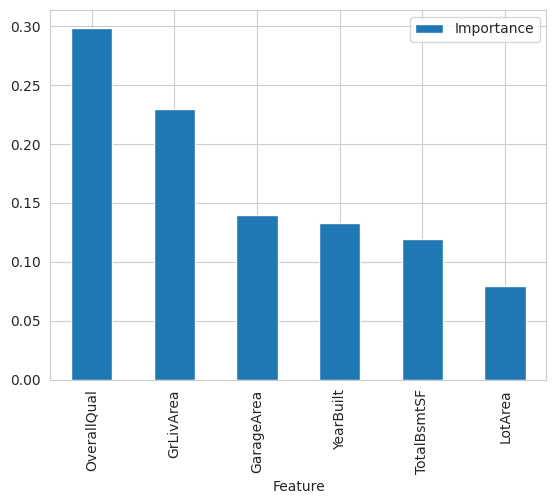

In [53]:
# after data cleaning and feat engine, the feature may space changes
# how much data cleaning and feature engineering does your pipeline have?
data_cleaning_feat_eng_steps = 2
columns_after_data_cleaning_feat_eng = (Pipeline(pipeline_clf.steps[:data_cleaning_feat_eng_steps])
                                        .transform(X_train)
                                        .columns)

# best_features = columns_after_data_cleaning_feat_eng
best_features = columns_after_data_cleaning_feat_eng[pipeline_clf['feat_selection'].get_support(
)].to_list()

# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': columns_after_data_cleaning_feat_eng[pipeline_clf['feat_selection'].get_support()],
    'Importance': pipeline_clf['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)

# reassign best features in order
best_features = df_feature_importance['Feature'].to_list()

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{best_features}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()


## Evaluate classifier on train and test sets

In [54]:
from sklearn.metrics import classification_report, confusion_matrix


def confusion_matrix_and_report(X, y, pipeline, label_map):

    prediction = pipeline.predict(X)

    print('---  Confusion Matrix  ---')
    print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
          columns=[["Actual " + sub for sub in label_map]],
          index=[["Prediction " + sub for sub in label_map]]
          ))
    print("\n")

    print('---  Classification Report  ---')
    print(classification_report(y, prediction, target_names=label_map), "\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

In [55]:
disc.binner_dict_['SalePrice']

[-inf, 129975.0, 163000.0, 214000.0, inf]

In [56]:
label_map = ['129,975 and under', '129,975 to 163,000', '163,000 to 214,000', '214,000 and over']
label_map

['129,975 and under',
 '129,975 to 163,000',
 '163,000 to 214,000',
 '214,000 and over']

In [57]:
clf_performance(X_train=X_train, y_train=y_train,
                        X_test=X_test, y_test=y_test,
                        pipeline=pipeline_clf,
                        label_map= label_map )

#### Train Set #### 

---  Confusion Matrix  ---
                              Actual 129,975 and under  \
Prediction 129,975 and under                       249   
Prediction 129,975 to 163,000                       38   
Prediction 163,000 to 214,000                        3   
Prediction 214,000 and over                          0   

                              Actual 129,975 to 163,000  \
Prediction 129,975 and under                         32   
Prediction 129,975 to 163,000                       238   
Prediction 163,000 to 214,000                        25   
Prediction 214,000 and over                           2   

                              Actual 163,000 to 214,000  \
Prediction 129,975 and under                          3   
Prediction 129,975 to 163,000                        30   
Prediction 163,000 to 214,000                       222   
Prediction 214,000 and over                          28   

                              Actual 214,000 and over  
Prediction 1

---

# Identifying which pipeline to choose?

We fitted 3 pipelines fitted:
* Regression
* Regression with PCA
* Classifier

The regressor pipelines didn't reach the expected performance threshold (0.7 R2 score) for the train and test set.

The classifier was tuned on Recall for class 0 (tenure <4 months), since we are interested to detect prospects that may churn soon. 
* It has reasonable performance for class 0 (<4 months) and class 2 (+20 months)
* Class 1 (4 to 20 months) has weak performance.

In [58]:
best_regressor_pipeline

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['BsmtExposure', 'BsmtFinType1',
                                           'GarageFinish', 'KitchenQual'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['1stFlrSF', '2ndFlrSF',
                                                     'BedroomAbvGr',
                                                     'BsmtExposure',
                                                     'BsmtFinSF1',...
                                                     'GarageYrBlt', 'GrLivArea',
                                                     'KitchenQual', 'LotArea',
                                                     'LotFront

# Refit pipeline with best features

## Rewrite Pipeline

In [59]:
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def PipelineOptimization(model):

    categorical_features = ['OverallQual'] 
    numerical_features = ['GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'LotArea']

    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OrdinalEncoder(encoding_method='arbitrary'), categorical_features),
            ("num", StandardScaler(), numerical_features)
        ]
    )

    pipeline_base = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model),
    ])

    return pipeline_base

### Split Train and Test Sets

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    df_houseprices_regression.drop(['SalePrice'], axis=1),
    df_houseprices_regression['SalePrice'],
    test_size=0.2,
    random_state=0
)

print("* Train set:", X_train.shape, y_train.shape,
      "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 21) (1168,) 
* Test set: (292, 21) (292,)


In [61]:
X_train = X_train.filter(best_features)
X_test = X_test.filter(best_features)

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)
X_train.head(3)

* Train set: (1168, 6) (1168,) 
* Test set: (292, 6) (292,)


,OverallQual,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,LotArea
618,9,1828,774,2007,1822,11694
870,5,894,308,1962,894,6600
92,5,964,432,1921,876,13360


In [62]:
X_test.head()

,OverallQual,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,LotArea
529,6,2515,484,1957,2035,32668
491,6,1578,240,1941,806,9490
459,5,1203,352,1950,709,7015
279,7,2022,505,1977,1160,10005
655,6,1092,264,1971,525,1680


## Grid Search CV – Sklearn

In [63]:
models_search_regressor

{'ExtraTreesRegressor': ExtraTreesRegressor(random_state=0)}

In [64]:
params_search = {'ExtraTreesRegressor':  {
    'model__n_estimators': [100, 300],
    'model__max_depth': [3, 10, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 4],
    'model__max_features': ['auto', 'sqrt'],
}
}
params_search

{'ExtraTreesRegressor': {'model__n_estimators': [100, 300],
  'model__max_depth': [3, 10, None],
  'model__min_samples_split': [2, 5],
  'model__min_samples_leaf': [1, 4],
  'model__max_features': ['auto', 'sqrt']}}

In [65]:
# Checking data types of best features
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1168 non-null   int64
 1   GrLivArea    1168 non-null   int64
 2   GarageArea   1168 non-null   int64
 3   YearBuilt    1168 non-null   int64
 4   TotalBsmtSF  1168 non-null   int64
 5   LotArea      1168 non-null   int64
dtypes: int64(6)
memory usage: 63.9 KB


In [66]:
# Recoded HyperparameterOptimizationSearch function for numerical variables
class HyperparameterOptimizationSearch_numerical:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization_numerical(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches


In [67]:
# Recoded PipelineOptimization function for numerical variables

def PipelineOptimization_numerical(model):

    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
         method="spearman", threshold=0.6, selection_method="variance")),

        ("feat_scaling", StandardScaler()),

        # ("feat_selection", SelectFromModel(model)),

        ("model", model),
    ])
    return pipeline_base

In [68]:
from sklearn.metrics import make_scorer, r2_score
import numpy as np

search = HyperparameterOptimizationSearch_numerical(models=models_search_regressor, params=params_search)
search.fit(X_train, y_train,
           scoring=make_scorer(r2_score),
           n_jobs=-1, cv=5)
best_regressor_pipeline = search.grid_searches['ExtraTreesRegressor'].best_estimator_




Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.8/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWa

Model Evaluation 

* Train Set
R2 Score: 0.965
Mean Absolute Error: 9229.029
Mean Squared Error: 216678031.666
Root Mean Squared Error: 14719.987


* Test Set
R2 Score: 0.812
Mean Absolute Error: 22009.58
Mean Squared Error: 1296197207.622
Root Mean Squared Error: 36002.739




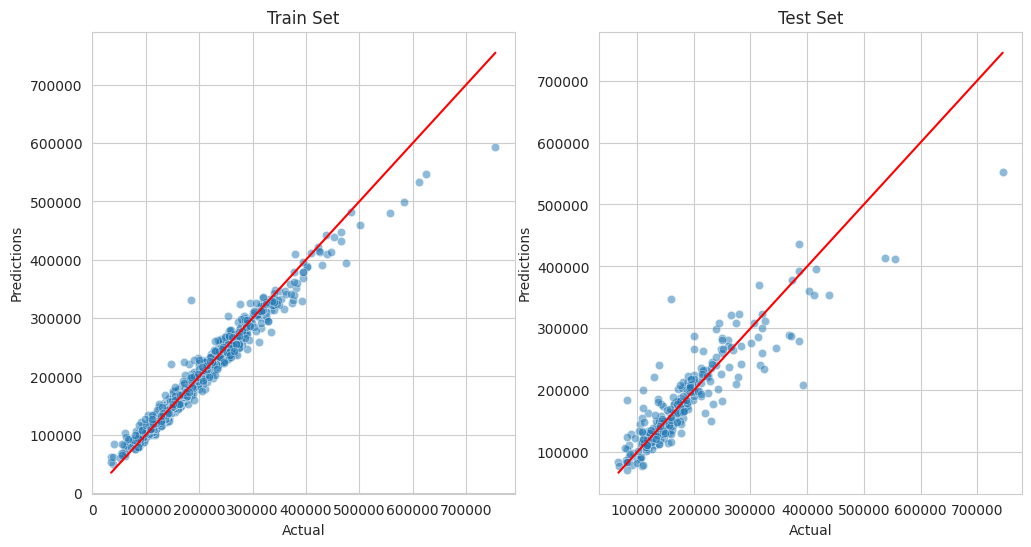

In [69]:
# Evaluating performance

regression_performance(X_train, y_train, X_test, y_test, best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

In [70]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,model__n_estimators
43,ExtraTreesRegressor,0.720153,0.807011,0.87795,0.055969,None,sqrt,1,5,300
36,ExtraTreesRegressor,0.755511,0.806186,0.871992,0.045276,None,auto,4,2,100
38,ExtraTreesRegressor,0.755511,0.806186,0.871992,0.045276,None,auto,4,5,100
37,ExtraTreesRegressor,0.750549,0.805545,0.873338,0.046701,None,auto,4,2,300
39,ExtraTreesRegressor,0.750549,0.805545,0.873338,0.046701,None,auto,4,5,300
42,ExtraTreesRegressor,0.705233,0.80457,0.878434,0.061034,None,sqrt,1,5,100
21,ExtraTreesRegressor,0.754767,0.8039,0.870335,0.045572,10,auto,4,2,300
23,ExtraTreesRegressor,0.754767,0.8039,0.870335,0.045572,10,auto,4,5,300
22,ExtraTreesRegressor,0.751798,0.803819,0.872782,0.047154,10,auto,4,5,100
20,ExtraTreesRegressor,0.751798,0.803819,0.872782,0.047154,10,auto,4,2,100


In [71]:
best_model = grid_search_summary.iloc[0,0]
best_model

'ExtraTreesRegressor'

In [72]:
pipeline_best = grid_search_pipelines[best_model].best_estimator_
pipeline_best

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['OverallQual', 'GrLivArea',
                                                     'GarageArea', 'YearBuilt',
                                                     'TotalBsmtSF',
                                                     'LotArea'])),
                ('feat_scaling', StandardScaler()),
                ('model',
                 ExtraTreesRegressor(max_features='sqrt', min_samples_split=5,
                                     n_estimators=300, random_state=0))])

## Assessing feature importance for best features model

* These are the 5 most important features in descending order. The model was trained on them: 
['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', 'LotArea']


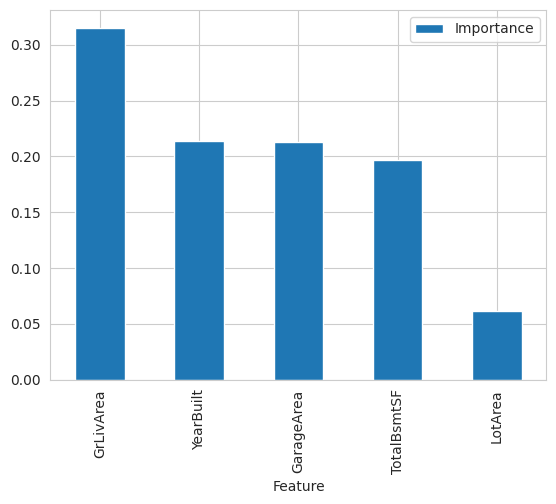

In [73]:
# how many data cleaning and feature engineering does your pipeline have?
data_cleaning_feat_eng_steps = 1
columns_after_data_cleaning_feat_eng = (Pipeline(pipeline_best.steps[:data_cleaning_feat_eng_steps])
                                        .transform(X_train)
                                        .columns)

best_features = columns_after_data_cleaning_feat_eng

# create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
    'Feature': columns_after_data_cleaning_feat_eng,
    'Importance': pipeline_best['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

# Evaluate model with best features on train and test sets

In [74]:
regression_performance(X_train=X_train, y_train=y_train,
                        X_test=X_test, y_test=y_test,
                        pipeline=pipeline_best)

Model Evaluation 

* Train Set
R2 Score: 0.965
Mean Absolute Error: 9229.029
Mean Squared Error: 216678031.666
Root Mean Squared Error: 14719.987


* Test Set
R2 Score: 0.812
Mean Absolute Error: 22009.58
Mean Squared Error: 1296197207.622
Root Mean Squared Error: 36002.739




# Pushing files to repo

In [75]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/regression_analysis/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/ml_pipeline/regression_analysis/v1'


### Train Set: features and target

In [76]:
X_train.head()

,OverallQual,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,LotArea
618,9,1828,774,2007,1822,11694
870,5,894,308,1962,894,6600
92,5,964,432,1921,876,13360
817,8,1689,857,2002,1568,13265
302,7,1541,843,2001,1541,13704


In [77]:
X_train.to_csv(f"{file_path}/X_train.csv", index=False)

In [78]:
y_train.head()

618    314813
870    109500
92     163500
817    271000
302    205000
Name: SalePrice, dtype: int64

In [79]:
y_train.to_csv(f"{file_path}/y_train.csv", index=False)

### Test Set: features and target

In [80]:
X_test.head()

,OverallQual,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,LotArea
529,6,2515,484,1957,2035,32668
491,6,1578,240,1941,806,9490
459,5,1203,352,1950,709,7015
279,7,2022,505,1977,1160,10005
655,6,1092,264,1971,525,1680


In [81]:
X_test.to_csv(f"{file_path}/X_test.csv", index=False)

In [82]:
y_test.head()

529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64

In [83]:
y_test.to_csv(f"{file_path}/y_test.csv", index=False)

### Modelling pipeline

In [84]:
pipeline_best

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['OverallQual', 'GrLivArea',
                                                     'GarageArea', 'YearBuilt',
                                                     'TotalBsmtSF',
                                                     'LotArea'])),
                ('feat_scaling', StandardScaler()),
                ('model',
                 ExtraTreesRegressor(max_features='sqrt', min_samples_split=5,
                                     n_estimators=300, random_state=0))])

In [85]:
joblib.dump(value=pipeline_clf, filename=f"{file_path}/pipeline_best.pkl")

['outputs/ml_pipeline/regression_analysis/v1/pipeline_best.pkl']

## Feature importance plot

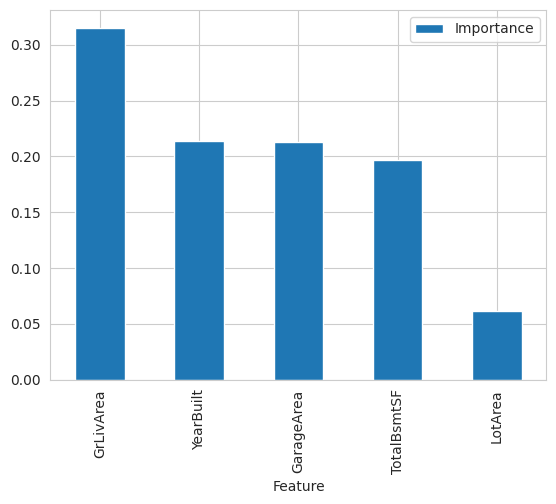

In [86]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.savefig(f'{file_path}/features_importance.png', bbox_inches='tight')

---